In [3]:
import pandas as pd
import json

In [2]:
# %pip install pandas jinja2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 13.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 13.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
global data
with open("win.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data["data"])

In [10]:
df

,round,red_agent,blue_agent,winner_name,winner_color
0,0,ABAgentWithCache,ABAgentWithCache,player 2 [agent:ABAgentWithCache],BLUE
1,0,ABAgentWithCache,GreedyAgent,player 1 [agent:ABAgentWithCache],RED
2,0,ABAgentWithCache,RandomAgent,player 1 [agent:ABAgentWithCache],RED
3,0,ABAgentWithCache,MCTSAgent,player 1 [agent:ABAgentWithCache],RED
4,0,ABAgentWithCache,MinimaxAgent,player 1 [agent:ABAgentWithCache],RED
5,0,GreedyAgent,ABAgentWithCache,player 2 [agent:ABAgentWithCache],BLUE
6,0,GreedyAgent,GreedyAgent,player 2 [agent:GreedyAgent],BLUE
7,0,GreedyAgent,RandomAgent,player 1 [agent:GreedyAgent],RED
8,0,GreedyAgent,MCTSAgent,player 1 [agent:GreedyAgent],RED
9,0,GreedyAgent,MinimaxAgent,player 1 [agent:GreedyAgent],RED


In [ ]:
df.pivot(index="red_agent", columns="blue_agent", values="winner_color")

blue_agent,ABAgentWithCache,GreedyAgent,MCTSAgent,MinimaxAgent,RandomAgent
red_agent,,,,,
ABAgentWithCache,BLUE,RED,RED,RED,RED
GreedyAgent,BLUE,BLUE,RED,RED,RED
MCTSAgent,BLUE,BLUE,BLUE,RED,RED
MinimaxAgent,RED,BLUE,RED,NaN,RED
RandomAgent,BLUE,BLUE,RED,RED,RED


In [21]:
def highlight(val):
    if val == "RED":
        return 'background-color: red'
    if val == "BLUE":
        return 'background-color: blue'
    return 'background-color: gray'
def make_pretty(styler):
    styler.set_caption("Match Result")
    styler.background_gradient(cmap='viridis')
    # styler.set_table_styles([headers, index_style])
    return styler

df.pivot(index="red_agent", columns="blue_agent", values="winner_color").rename_axis("Blue Agent", axis=1).rename_axis(index={
    "red_agent": "Red Agent",
}).style.apply(lambda x: x.map(highlight), axis=None).pipe(make_pretty)

Blue Agent,ABAgentWithCache,GreedyAgent,MCTSAgent,MinimaxAgent,RandomAgent
Red Agent,,,,,
ABAgentWithCache,BLUE,RED,RED,RED,RED
GreedyAgent,BLUE,BLUE,RED,RED,RED
MCTSAgent,BLUE,BLUE,BLUE,RED,RED
MinimaxAgent,RED,BLUE,RED,nan,RED
RandomAgent,BLUE,BLUE,RED,RED,RED


In [12]:
global usage
with open("usage.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data["data"])

In [13]:
df

,round,red_agent,blue_agent,winner_name,winner_color,ABAgentWithCache,GreedyAgent,RandomAgent,MCTSAgent,MinimaxAgent
0,0,ABAgentWithCache,ABAgentWithCache,ABAgentWithCache,BLUE,"{'memory_used': 1.6796875, 'time_elapsed': 105...",NaN,NaN,NaN,NaN
1,0,ABAgentWithCache,GreedyAgent,ABAgentWithCache,RED,"{'memory_used': 1.6796875, 'time_elapsed': 95....",NaN,NaN,NaN,NaN
2,0,ABAgentWithCache,RandomAgent,ABAgentWithCache,RED,"{'memory_used': 1.6796875, 'time_elapsed': 99....",NaN,NaN,NaN,NaN
3,0,ABAgentWithCache,MCTSAgent,ABAgentWithCache,RED,"{'memory_used': 1.6796875, 'time_elapsed': 96....",NaN,NaN,NaN,NaN
4,0,ABAgentWithCache,MinimaxAgent,ABAgentWithCache,RED,"{'memory_used': 1.6796875, 'time_elapsed': 96....",NaN,NaN,NaN,NaN
5,0,GreedyAgent,ABAgentWithCache,ABAgentWithCache,BLUE,"{'memory_used': 1.6796875, 'time_elapsed': 99....",NaN,NaN,NaN,NaN
6,0,GreedyAgent,GreedyAgent,GreedyAgent,BLUE,NaN,"{'memory_used': 1.0390625, 'time_elapsed': 0.3...",NaN,NaN,NaN
7,0,GreedyAgent,RandomAgent,GreedyAgent,RED,NaN,"{'memory_used': 1.0390625, 'time_elapsed': 0.2...",NaN,NaN,NaN
8,0,GreedyAgent,MCTSAgent,GreedyAgent,RED,NaN,"{'memory_used': 1.0390625, 'time_elapsed': 0.2...",NaN,NaN,NaN
9,0,GreedyAgent,MinimaxAgent,GreedyAgent,RED,NaN,"{'memory_used': 1.0390625, 'time_elapsed': 0.2...",NaN,NaN,NaN


In [ ]:
# Sum of memory usage 
agents = ["ABAgentWithCache" , "GreedyAgent", "RandomAgent", "MCTSAgent", "MinimaxAgent"]
columns = ["Average Memory Usage", "Average time spent for the game"]


In [1]:
BOARD_WEIGHT_RED = [
    [0, 0, 0, 0, 0, 0, 0, 0],
    [40, 40, 40, 40,40, 40, 40, 40],
    [50, 50, 50, 50,50, 50, 50, 50],
    [60, 60, 60, 60,60, 60, 60, 60],
    [70, 70, 70, 70,70, 70, 70, 70],
    [80, 80, 80, 80,80, 80, 80, 80],
    [90, 90, 90, 90,90, 90, 90, 90],
    [100, 101, 100, 101, 101, 100, 101, 100]
]

BOARD_WEIGHT_BLUE = [
    [100, 101, 100, 101, 101, 100, 101, 100],
    [90, 90, 90, 90,90, 90, 90, 90],
    [80, 80, 80, 80,80, 80, 80, 80],
    [70, 70, 70, 70,70, 70, 70, 70],
    [60, 60, 60, 60,60, 60, 60, 60],
    [50, 50, 50, 50,50, 50, 50, 50],
    [40, 40, 40, 40,40, 40, 40, 40],
    [0, 0, 0, 0, 0, 0, 0, 0],
]

In [2]:
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current Axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(range(8), labels=col_labels,
                  rotation=-30, ha="right", rotation_mode="anchor")
    ax.set_yticks(range(8), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(8+1)-.5, minor=True)
    ax.set_yticks(np.arange(8+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)


    return im, ax

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

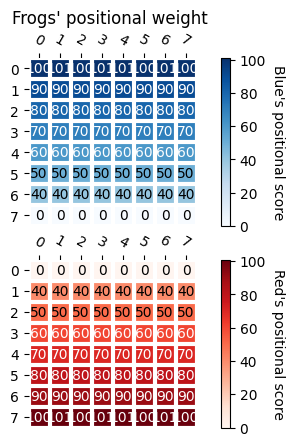

In [44]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl
fig,(ax, ax2) = plt.subplots(2)
im, cbar = heatmap(BOARD_WEIGHT_BLUE,[i for i in range(8)], [i for i in range(8)], ax=ax,
                   cmap="Blues", cbarlabel="Blue's positional score")
texts = annotate_heatmap(im, valfmt="{x}")
ax.set_title("Blue's positional weight ")

im2,cbar2 = heatmap(BOARD_WEIGHT_RED,[i for i in range(8)], [i for i in range(8)], ax=ax2,
                   cmap="Reds", cbarlabel="Red's positional score")
texts = annotate_heatmap(im2, valfmt="{x}")
ax.set_title("Frogs' positional weight ")

# fig.tight_layout()
plt.show()


In [1]:
import pandas as pd
import json

global data
with open("resultABs.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df["red_agent_name"] = pd.DataFrame(df.red_agent.values.tolist())['name']
df["red_agent_time"] = pd.DataFrame(df.red_agent.values.tolist())['time_elapsed']
df["red_agent_memory"] = pd.DataFrame(df.red_agent.values.tolist())['memory_peak']
df["blue_agent_name"] = pd.DataFrame(df.blue_agent.values.tolist())['name']
df["blue_agent_time"] = pd.DataFrame(df.blue_agent.values.tolist())['time_elapsed']
df["blue_agent_memory"] = pd.DataFrame(df.blue_agent.values.tolist())['memory_peak']
df["result"] = df.apply(lambda x: x["red_agent_name"] if x["result"] == "Red" else x["blue_agent_name"] if x["result"]=="BLUE" else x["result"], axis=1)

In [2]:
df

,round,red_agent,blue_agent,result,red_agent_name,red_agent_time,red_agent_memory,blue_agent_name,blue_agent_time,blue_agent_memory
0,0,{'name': 'player 1 [agent:ABAgentWithCacheV2]'...,"{'name': 'player 2 [agent:ABAgent]', 'time_ela...",player 1 [agent:ABAgentWithCacheV2],player 1 [agent:ABAgentWithCacheV2],100.182248,-1,player 2 [agent:ABAgent],72.956392,-1
1,1,"{'name': 'player 1 [agent:ABAgent]', 'time_ela...",{'name': 'player 2 [agent:ABAgentWithCacheV2]'...,player 2 [agent:ABAgentWithCacheV2],player 1 [agent:ABAgent],90.022634,-1,player 2 [agent:ABAgentWithCacheV2],89.775493,-1
2,2,{'name': 'player 1 [agent:ABAgentWithCacheV2]'...,"{'name': 'player 2 [agent:ABAgent]', 'time_ela...",player 1 [agent:ABAgentWithCacheV2],player 1 [agent:ABAgentWithCacheV2],100.219608,-1,player 2 [agent:ABAgent],73.334673,-1
3,3,"{'name': 'player 1 [agent:ABAgent]', 'time_ela...",{'name': 'player 2 [agent:ABAgentWithCacheV2]'...,Draw,player 1 [agent:ABAgent],56.901818,-1,player 2 [agent:ABAgentWithCacheV2],162.927011,-1
4,4,{'name': 'player 1 [agent:ABAgentWithCacheV2]'...,"{'name': 'player 2 [agent:ABAgent]', 'time_ela...",player 1 [agent:ABAgentWithCacheV2],player 1 [agent:ABAgentWithCacheV2],100.107875,-1,player 2 [agent:ABAgent],73.174317,-1
5,5,"{'name': 'player 1 [agent:ABAgent]', 'time_ela...",{'name': 'player 2 [agent:ABAgentWithCacheV2]'...,player 2 [agent:ABAgentWithCacheV2],player 1 [agent:ABAgent],89.773824,-1,player 2 [agent:ABAgentWithCacheV2],90.594110,-1
6,6,{'name': 'player 1 [agent:ABAgentWithCacheV2]'...,"{'name': 'player 2 [agent:ABAgent]', 'time_ela...",player 1 [agent:ABAgentWithCacheV2],player 1 [agent:ABAgentWithCacheV2],100.259187,-1,player 2 [agent:ABAgent],73.542137,-1
7,7,"{'name': 'player 1 [agent:ABAgent]', 'time_ela...",{'name': 'player 2 [agent:ABAgentWithCacheV2]'...,player 2 [agent:ABAgentWithCacheV2],player 1 [agent:ABAgent],56.564485,-1,player 2 [agent:ABAgentWithCacheV2],105.520048,-1
8,8,{'name': 'player 1 [agent:ABAgentWithCacheV2]'...,"{'name': 'player 2 [agent:ABAgent]', 'time_ela...",player 1 [agent:ABAgentWithCacheV2],player 1 [agent:ABAgentWithCacheV2],100.763000,-1,player 2 [agent:ABAgent],73.094445,-1
9,9,"{'name': 'player 1 [agent:ABAgent]', 'time_ela...",{'name': 'player 2 [agent:ABAgentWithCacheV2]'...,player 2 [agent:ABAgentWithCacheV2],player 1 [agent:ABAgent],92.425806,-1,player 2 [agent:ABAgentWithCacheV2],150.058171,-1


In [3]:
df["result"].value_counts()

result
player 1 [agent:ABAgentWithCacheV2]    10
player 2 [agent:ABAgentWithCacheV2]     6
Draw                                    2
player 1 [agent:ABAgent]                2
Name: count, dtype: int64

In [ ]:
    """// // [
// //     {
// //         "round": 0,
// //         "red_agent": {
// //             "name": "player 1 [agent:ABAgentWithCacheV2]",
// //             "time_elapsed": 123.97556999999999,
// //             "memory_peak": -1
// //         },
// //         "blue_agent": {
// //             "name": "player 2 [agent:ABAgent]",
// //             "time_elapsed": 90.89783699999992,
// //             "memory_peak": -1
// //         },
// //         "result": "BLUE"
// //     },
// //     {
// //         "round": 1,
// //         "red_agent": {
// //             "name": "player 1 [agent:ABAgent]",
// //             "time_elapsed": 93.855418,
// //             "memory_peak": -1
// //         },
// //         "blue_agent": {
// //             "name": "player 2 [agent:ABAgentWithCacheV2]",
// //             "time_elapsed": 128.97803399999992,
// //             "memory_peak": -1
// //         },
// //         "result": "Red"
// //     },
// //     {
// //         "round": 2,
// //         "red_agent": {
// //             "name": "player 1 [agent:ABAgentWithCacheV2]",
// //             "time_elapsed": 123.24188500000002,
// //             "memory_peak": -1
// //         },
// //         "blue_agent": {
// //             "name": "player 2 [agent:ABAgent]",
// //             "time_elapsed": 79.24462300000002,
// //             "memory_peak": -1
// //         },
// //         "result": "BLUE"
// //     },
// //     {
// //         "round": 3,
// //         "red_agent": {
// //             "name": "player 1 [agent:ABAgent]",
// //             "time_elapsed": 94.43569800000006,
// //             "memory_peak": -1
// //         },
// //         "blue_agent": {
// //             "name": "player 2 [agent:ABAgentWithCacheV2]",
// //             "time_elapsed": 128.45031600000004,
// //             "memory_peak": -1
// //         },
// //         "result": "Red"
// //     }
// // ]
// [
//     {
//         "round": 0,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 169.7592010000001,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgent]",
//             "time_elapsed": 66.06977099999993,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 1,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgent]",
//             "time_elapsed": 73.93105799999995,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 98.86444499999998,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 2,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 172.25808399999997,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgent]",
//             "time_elapsed": 69.19050700000003,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 3,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgent]",
//             "time_elapsed": 73.883483,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 98.41575699999997,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 4,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 178.38582699999992,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgent]",
//             "time_elapsed": 71.29575099999998,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 5,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgent]",
//             "time_elapsed": 74.06274200000004,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 98.94721599999998,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 6,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 177.64957799999993,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgent]",
//             "time_elapsed": 70.87634299999995,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 7,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgent]",
//             "time_elapsed": 73.69922200000003,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 98.63370400000004,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 8,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 178.42282800000012,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgent]",
//             "time_elapsed": 70.61128099999999,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 9,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgent]",
//             "time_elapsed": 73.65856800000003,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 98.91694499999997,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 10,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 178.19433299999994,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgent]",
//             "time_elapsed": 70.99767900000002,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 11,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgent]",
//             "time_elapsed": 73.49792099999996,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 98.39504800000002,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 12,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 178.224438,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgent]",
//             "time_elapsed": 70.61496100000004,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 13,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgent]",
//             "time_elapsed": 73.90361999999996,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 97.90213799999992,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 14,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 178.49147500000004,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgent]",
//             "time_elapsed": 70.64044799999995,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 15,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgent]",
//             "time_elapsed": 73.42078200000002,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 98.48321699999995,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 16,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 178.09739499999992,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgent]",
//             "time_elapsed": 70.91156599999998,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 17,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgent]",
//             "time_elapsed": 73.584033,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 98.50357399999999,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 18,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 178.3928350000001,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgent]",
//             "time_elapsed": 71.09794899999994,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     },
//     {
//         "round": 19,
//         "red_agent": {
//             "name": "player 1 [agent:ABAgent]",
//             "time_elapsed": 73.58494499999998,
//             "memory_peak": -1
//         },
//         "blue_agent": {
//             "name": "player 2 [agent:ABAgentWithCacheV2]",
//             "time_elapsed": 98.37814399999998,
//             "memory_peak": -1
//         },
//         "result": "Red"
//     }
// ]
    """